In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

In [ ]:
#Function to generate Regular Brownian Motion
def reg_brownian(T,step,s):
  t=np.arange(0,T,step)
  values=np.zeros(len(t))
  values[0]=0
  #np.random.seed(s)
  for i in range(len(t)):
    values[i]=values[i-1]+random.normalvariate(0,1)
  values=values*math.sqrt(step)
  return values

Q.1)

Text(0.5, 1.0, 'Regular Brownian motion using normal distribution')

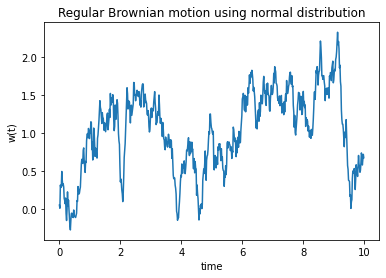

In [ ]:
#Regular Brownian motion

steps=64   #tosses per unit time
s=5
T=10
steps=1/steps
w=reg_brownian(T,steps,s)
t=np.arange(0,T,steps)
plt.plot(t,w)
plt.xlabel('time')
plt.ylabel('w(t)')
plt.title('Regular Brownian motion using normal distribution')

In [ ]:
#Function to generate Geometric Brownian motion
def geo_brownian(s0,mu,sigma,T,steps,s):
  t=np.arange(0,T,steps)
  ans=np.zeros(len(t))
  ans[0]=0
  w2=reg_brownian(T,steps,s)     #Taking brownian values
  for i in range(len(t)):
    w=w2[i]*sigma
    y=mu-(sigma*sigma)/2
    x=s0*math.exp(y*t[i]+w)
    ans[i]=x
  return ans

Q.2)

Text(0.5, 1.0, 'GBM stock price')

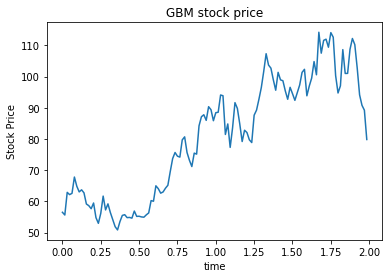

In [ ]:
#Geometric Brownian motion 
s0=55.25
mu=0.15
sigma=0.4
T=2
steps=64
steps=1/steps
t=np.arange(0,T,steps)
ans=geo_brownian(s0,mu,sigma,T,steps,s)
plt.plot(t,ans)
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.title('GBM stock price')

Q.3) Reliance stock using GBM

0.1870304475258579 0.13778776642525223


Text(0.5, 1.0, 'Taking s0= stock price on 1-Jan-2011')

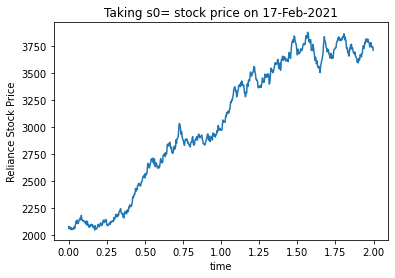

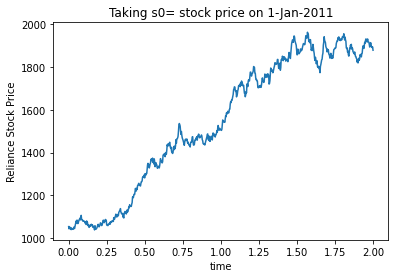

In [ ]:
rel=pd.read_csv('REL.csv')
cp=rel['Close Price']
number=len(cp)-1
sum=0
for i in range(len(cp)-1):
  sum+=(cp[i]-cp[i+1])/cp[i+1]
mu=sum/number
u=[]
sum=0
for i in range(len(cp)-1):
  u.append(np.log(cp[i]/cp[i+1]))
  sum+=u[-1]
ubar=sum/number
s2=0
for i in u:
  s2+=((i-ubar)*(i-ubar))
s2=s2/(number-1)
tau=10            #2011-2021(10 years)
sigma=np.sqrt(s2/tau)

seed=22
T=2.0
steps=365
s0=cp[0]
print(mu*365,sigma*math.sqrt(365))
steps=1/steps
t=np.arange(0,T,steps)
ans=geo_brownian(s0,mu*365,sigma*math.sqrt(365),T,steps,seed)
plt.plot(t,ans)
plt.xlabel('time')
plt.ylabel('Reliance Stock Price')
plt.title('Taking s0= stock price on 17-Feb-2021')

plt.figure();
s0=cp[len(cp)-1]
ans=geo_brownian(s0,mu*365,sigma*math.sqrt(365),T,steps,seed)
plt.plot(t,ans)
plt.xlabel('time')
plt.ylabel('Reliance Stock Price')
plt.title('Taking s0= stock price on 1-Jan-2011')


In [ ]:
s0,k=input().split()
r,sigma=input().split()
t,n,s=input().split()

50 20
0.1 0.25
1 10 5


In [ ]:
def option_price(st,k,r,sigma,t2,T):
  t=(T-t2)/360
  d1=(math.log(st/k)+(r+(sigma*sigma)/2)*t)/(sigma*math.sqrt(t))
  d2=d1-(sigma*math.sqrt(t))
  x1=st*norm.cdf(d1)
  x2=k*math.exp(-r*t)*norm.cdf(d2)
  return x1-x2

In [ ]:
s0=float(s0)
k=float(k)
r=float(r)
sigma=float(sigma)
t=float(t)
n=int(n)
s=int(s)
random.seed(s)
t2=np.arange(0,t*30,1)
op=np.zeros(len(t2))
for it in range(n):
  stock_price=geo_brownian(s0,r,sigma,t*30,1,s)
  cnt=0
  for i in stock_price:
      op[cnt]+=option_price(i,k,r,sigma,cnt,t*30)
      cnt+=1
for i in op:
  print(i/n)

28.474822933592776
27.899208660148638
36.47908145431829
42.28022851965561
48.01975809421329
51.025879013095114
58.99393509804779
61.63321765454134
77.82338385883803
87.47067850230528
121.74258774539594
131.0676428794938
127.59857909308118
153.26318068327421
167.99439202443511
231.27233450705558
307.177254777395
338.4818466577383
390.5183821223187
493.73515612557804
643.6232375378968
677.7790492312006
1132.7745655101623
1119.3721144374333
1300.1677500403337
1119.9227027462364
1273.603953852838
1361.3633607269205
1620.7473776379932
1722.2910953804083
